## Monthly use of Citbike rides by user type
#### Q1 When is the peak times for citibike rides
#### Q2 what is the increase in citibike riders by usertype
#### Q3 is there room for increased usership.



In [1]:
#libraries needed
import csv
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import os

## this is the datetime class that has useful functions to manipulate dates.
from datetime import datetime

from plotly.tools import FigureFactory as ff
import plotly
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

### First thing I did is to import each file, read the data and calculate riders, subscribers and customers


In [2]:
#import data directory the . at the start is the location of the python file
import_directory='./trip_data_monthly/'

#empyty lists to store data in
months_list=[]
total_rides=[]
subs_rides=[]
cust_rides=[]

#iterate over files in a directory
for file in os.listdir(import_directory):
    if file.endswith(".csv"):# this was important as their were hidden files in the folder that messed with my code further down
        df_month = pd.read_csv(import_directory + file)
    
#first i got the month information ads to my data
        month=file[0:6]
        months_list.append(month)
        #the print here is just to se my code working
        print(month)
        
#in the next phase i got the rider information and numbers

        # i had to do this because the label changed so i renamed the column to make it consistent
        df_month.rename(columns={df_month.columns[12]: "User Type" }, inplace=True)
    
       
    #this is a fun piece of code that allows you to group the data by what is in the table and perform functions on it
    #in this case by User Type. the .size() returns the size (or count) of how many of each group their is
    
        df_sub_rides= df_month.groupby(['User Type']).size()
        
        # the data is stored in a groupby format, but i can get the imformation out by selting the first or second element
        #and appending the information to me list to use later
        cust_rides.append(df_sub_rides[0])
        subs_rides.append(df_sub_rides[1])
   
    
        #Here I just calculate total rides from adding the groups together and appending to the total list
        total_rides.append(df_sub_rides[0]+df_sub_rides[1])


#more prints to check all have 35 months
print(len(months_list))    
print(len(total_rides))    
print(len(subs_rides))
print(len(cust_rides))  




201709
201401
201809
201701
201602
201902
201512
201411
201801
201504
201608
201510
201803
201406
201506
201703
201610
201606
201705
201805
201403
201508
201807
201502
201811
201711
201612
201604
201707
201409
201404
201603
201405
201505
201903
201410
201708
201808
201507
201511
201901
201802
201412
201702
201601
201402
201609
201407
201509
201607
201704
201712
201611
201501
201812
201804
201503
201810
201806
201605
201706
201710
201408
63
63
63
63


### Now I can make a table and graphs of the data to analyse it

In [3]:
#i can make a dictionary of the lists and use it to build a dataframe in order to organise the data
dict_of_date={}
dict_of_date['month'] = months_list
dict_of_date['Total rides'] = total_rides
dict_of_date['Subscribers'] = subs_rides
dict_of_date['Customers'] = cust_rides

#use this code to build the dataframe from a dictionary. the key is the column title and the value is a list
df_stats = pd.DataFrame.from_dict(dict_of_date)

#after building the dataframe i want it in order of month, i can do this by sorting the month column 
df_stats_sorted=df_stats.sort_values(by=['month'])
df_stats_sorted.head()

,month,Total rides,Subscribers,Customers
1,201401,300400,293146,7254
45,201402,224736,218019,6717
20,201403,439117,416235,22882
30,201404,670780,607733,63047
32,201405,866117,758566,107551


### As you can see from the graph below ride numbers are really interesting throughout the year, with the peaks in summer and drops in the winter

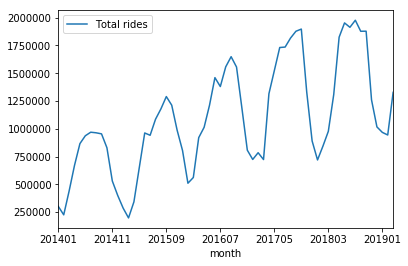

In [4]:
#here i shall plot the data roughly using matplot lib
df_stats_sorted.plot(kind='line',x='month',y='Total rides')

### Form the graph below we can see that both Subscriber and Customer rides fluctuate thorought the year, but the general trend is an increase for both.

In [15]:

#here i am using plotly instead to plot the data. note: here I told x axis station ids to be a catagory 
#in the layout section, this is because as they are, they are plotted as numbers

#define each line individually 
trace_total = go.Scatter(x= df_stats_sorted['month'],y=df_stats_sorted['Total rides'], name= 'Total Rides')
trace_cust = go.Scatter(x= df_stats_sorted['month'],y=df_stats_sorted['Customers'], name= 'Customer Rides', yaxis='y2')
trace_Subs = go.Scatter(x= df_stats_sorted['month'],y=df_stats_sorted['Subscribers'], name= 'Subscriber Rides')

#commit it to data
data_total=[trace_total, trace_cust, trace_Subs]

#adjust the layout settings
layout_total = go.Layout(xaxis=dict(type='category', title='Month'),yaxis=dict(title='Number of Rides'), yaxis2=dict(title='Number of Customer Rides', overlaying='y', side='right'))

#commit to figure
fig = go.Figure(data=data_total, layout=layout_total)
#plot in notebook
plotly.offline.iplot(fig, filename='Rides.html')

### Because of the interesting trend mentioned above I should look at the numbers per year, i should be able to do this by taking the sorted dataframe and tweeking the data to work out by year. As i had to do this three times i wrote a function

In [7]:
# now i should look at the numbers per year, i should be able to do this by taking the sorted dataframe and tweeling the data 
# to work out by year. as i had to do this three times i wrote a functions

def yearly_riders (sorted_dataframe, column_name):
    yearlist=[]
    
    data_list = sorted_dataframe [column_name].tolist()
    year1=sum(data_list[0:12])
    year2=sum(data_list[12:24])
    year3=sum(data_list[24:36])
    year4=sum(data_list[36:48])
    year5=sum(data_list[48:60])
    
    yearlist.append(year1)
    yearlist.append(year2)
    yearlist.append(year3)
    yearlist.append(year4)
    yearlist.append(year5)
    
    return yearlist



year_list=['2014','2015','2016', '2017', '2018']

#make a dictionary of the new lists
dict_of_yearly={}
dict_of_yearly['year'] = year_list
dict_of_yearly['Total rides'] = yearly_riders(df_stats_sorted, 'Total rides')
dict_of_yearly['Subscribers'] = yearly_riders(df_stats_sorted, 'Subscribers')
dict_of_yearly['Customers'] = yearly_riders(df_stats_sorted, 'Customers')

#use this code to build the dataframe from a dictionary. the key is the column title and the value is a list
df_yearly_stats = pd.DataFrame.from_dict(dict_of_yearly)
df_yearly_stats.head()


,year,Total rides,Subscribers,Customers
0,2014,8081216,7287721,793495
1,2015,9937969,8626638,1311331
2,2016,13809784,12301711,1508073
3,2017,16348748,14579325,1769423
4,2018,17548339,15614825,1933514


### The graph shows that rider numbers increase over time but the shapes of the graphs differs between the two with subscriber rides appearing sigmoidal and customer rides as hyperbolic, mostly because of the highish year in 2015 for customer rides.

In [14]:
#define each line individually 
trace_total_year = go.Scatter(x= df_yearly_stats['year'],y=df_yearly_stats['Total rides'], name= 'Total Rides')
trace_cust_year = go.Scatter(x= df_yearly_stats['year'],y=df_yearly_stats['Customers'], name= 'Customer Rides', yaxis='y2')
trace_Subs_year = go.Scatter(x= df_yearly_stats['year'],y=df_yearly_stats['Subscribers'], name= 'Subscriber Rides')

#commit it to data
data_year=[trace_total_year, trace_cust_year, trace_Subs_year]

#adjust the layout settings
layout_year = go.Layout(xaxis=dict(type='category', title='Year'),yaxis=dict(title='Number of Rides (Total and Subscriber)'), yaxis2=dict(title='Number of Customer Rides', overlaying='y', side='right'))

#commit to figure
fig_year = go.Figure(data=data_year, layout=layout_year)
#plot in notebook
plotly.offline.iplot(fig_year, filename='Rides.html')

In [ ]:
Total = df_yearly_stats['Total rides'].sum()
print (Total)